![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [99]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
workout = pd.read_csv('data/workout.csv')
workout.head()

,month,workout_worldwide
0,2018-03,59
1,2018-04,61
2,2018-05,57
3,2018-06,56
4,2018-07,51


In [101]:
workout['year'] = workout['month'].str[:4]
workout.head()

,month,workout_worldwide,year
0,2018-03,59,2018
1,2018-04,61,2018
2,2018-05,57,2018
3,2018-06,56,2018
4,2018-07,51,2018


In [102]:
year_workout = workout.groupby('year')['workout_worldwide'].sum().sort_values(ascending=False)

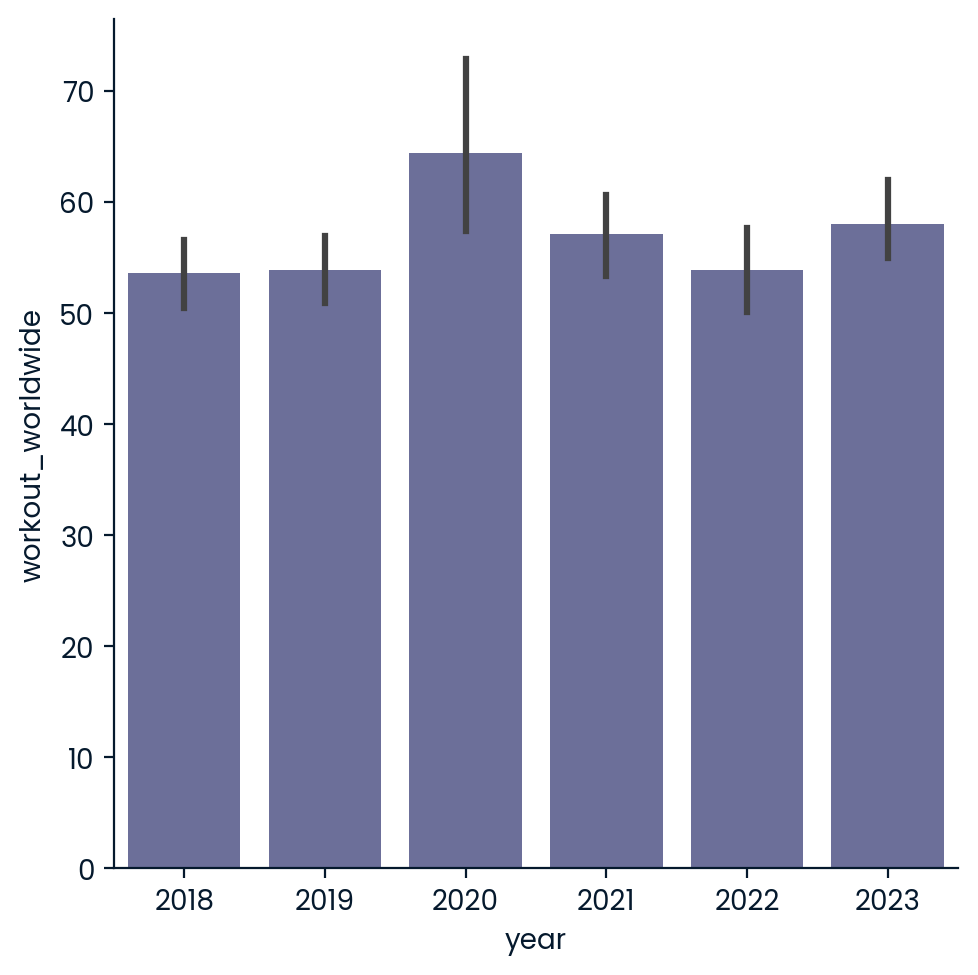

In [103]:
sns.catplot(data=workout,kind='bar',x='year',y='workout_worldwide')

In [104]:
year_str = '2020'

In [105]:
three_keywords = pd.read_csv('data/three_keywords.csv')
three_keywords.head()

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03,12,16,10
1,2018-04,12,18,10
2,2018-05,13,16,9
3,2018-06,12,17,9
4,2018-07,12,17,9


In [106]:
three_keywords['year'] = three_keywords['month'].str[:4]
three_keywords_grouped = three_keywords.groupby('year',as_index=False)[['home_workout_worldwide','gym_workout_worldwide','home_gym_worldwide']].sum()

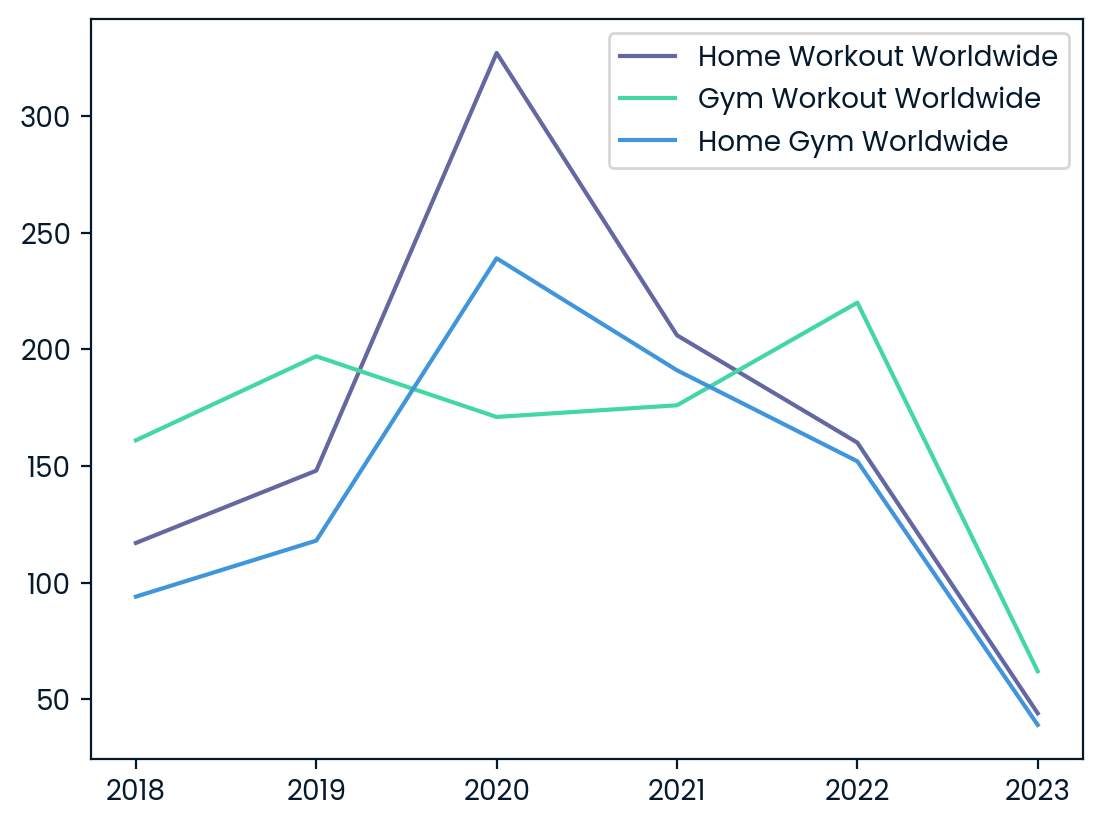

In [107]:
fig, ax = plt.subplots()
ax.plot(three_keywords_grouped['year'],three_keywords_grouped['home_workout_worldwide'], label='Home Workout Worldwide')
ax.plot(three_keywords_grouped['year'],three_keywords_grouped['gym_workout_worldwide'], label='Gym Workout Worldwide')
ax.plot(three_keywords_grouped['year'],three_keywords_grouped['home_gym_worldwide'], label='Home Gym Worldwide')
ax.legend()
plt.show()

In [108]:
peak_covid = 'home'
current = 'gym'

In [109]:
workout_geo = pd.read_csv('data/workout_geo.csv')
workout_geo

,country,workout_2018_2023
0,Guam,NaN
1,Falkland Islands (Islas Malvinas),NaN
2,Cook Islands,NaN
3,Brunei,NaN
4,Palau,NaN
...,...,...
245,Tokelau,NaN
246,Tuvalu,NaN
247,U.S. Outlying Islands,NaN
248,Vatican City,NaN


In [110]:
workout_geo.sort_values('workout_2018_2023',ascending=False)[:1]

,country,workout_2018_2023
5,United States,100.0


In [111]:
top_country = 'United States'

In [112]:
three_keywords_geo = pd.read_csv('data/three_keywords_geo.csv')
MESA_region = three_keywords_geo[(three_keywords_geo['Country'] == 'Philippines') | (three_keywords_geo['Country'] == 'Malaysia') ]

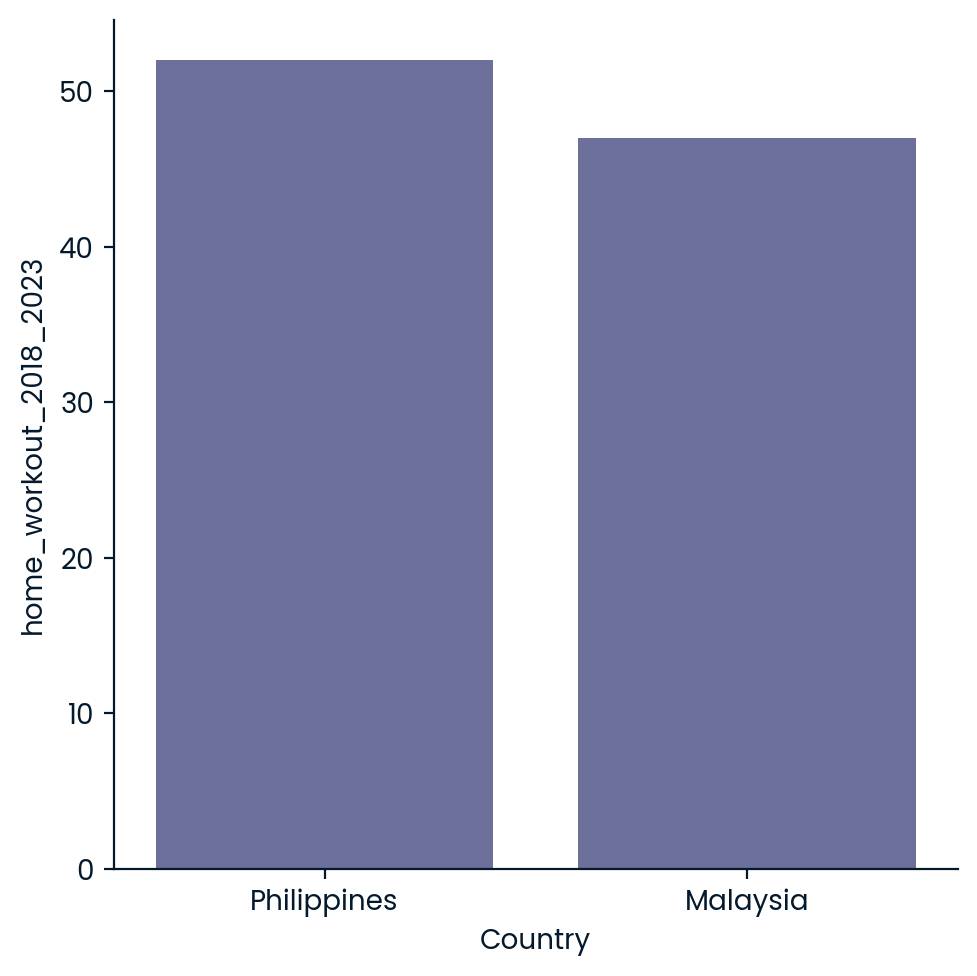

In [113]:
sns.catplot(data=MESA_region,kind='bar',x='Country',y='home_workout_2018_2023')

In [114]:
home_workout_geo = 'Philippines'

In [115]:
#keywords_grouped['home_workout_worldwide'] + keywords_grouped['gym_workout_worldwide'] + keywords_grouped['home_gym_worldwide']